In [24]:
# Importar las librerías necesarias
from IPython.display import Image
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

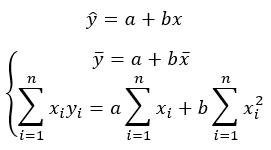

In [3]:
Image("regresión.png")

In [6]:

# Leer el archivo CSV (asumiendo que el archivo se llama 'datos.csv')
data = pd.read_csv("publicidad.csv")
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [9]:
# Eliminar dos variables del dataframe (asumiendo que queremos mantener solo 'TV' y 'Sales')
data = data.drop(['Radio', 'Newspaper'], axis=1)
data

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
...,...,...
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5


In [10]:
# Calcular las medias de las variables

x_barra = np.mean(data['TV'])
y_barra = np.mean(data['Sales'])

print("x_barra",x_barra, "\ny_barra",y_barra)

x_barra 147.0425 
y_barra 14.0225


In [13]:
# Calculando las sumatorias de las ecuaciuones de regresion

suma_xy = sum (data['TV']*data['Sales'])
suma_x = sum(data['TV'])
suma_x2 = sum( data['TV']**2)

print ("suma xy=", suma_xy, "\nsuma x=",suma_x, "\nsuma x2=",suma_x2)

suma xy= 482108.34 
suma x= 29408.5 
suma x2= 5791118.39


In [14]:
#formando la representacion matricial AX = b

A = np.array([(1,x_barra),(suma_x, suma_x2)])
print("A=", A)

b= np.array([y_barra,suma_xy])

print("\nb=",b)

A= [[1.00000000e+00 1.47042500e+02]
 [2.94085000e+04 5.79111839e+06]]

b= [1.4022500e+01 4.8210834e+05]


In [15]:
detA = np.linalg.det(A)
detA


np.float64(1466819.0287499996)

In [17]:
#Aplicand el metodo de la inversa
invA = np.linalg.inv(A)
x_sol = np.dot(invA,b.T)
x_sol

array([7.03259355, 0.04753664])

In [28]:
X = data[["TV"]]
y = data["Sales"]

rls = LinearRegression()
rls.fit(X,y)

LinearRegression()

In [30]:
coef1 = pd.DataFrame(rls.coef_,['Pendiente'], columns = ['Coeficientes'])
coef2 = pd.DataFrame(rls.intercept_,['Intercepto'],columns = ['Coeficientes'])
coeficientes = pd.concat([coef1,coef2],axis=0)
coeficientes

,Coeficientes
Pendiente,0.047537
Intercepto,7.032594
